PREDICTION GENRE OF BOOKS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
import seaborn as sn


In [38]:
books = pd.read_csv('BooksDataSet.csv')

In [39]:
books

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...,...
4898,2995,10372180,White Death,Thriller,"A Novel from the NUMA files, A Kurt Austin Ad..."
4899,2996,14504372,Venus with Pistol,Thriller,Gilbert Kemp is dealer specializing in antiqu...
4900,2997,3617412,Blackwater,Thriller,"""How do you know when you're in too deep? Dav..."
4901,2998,11320975,The Rainbow and the Rose,Thriller,The story concerns the life of Johnnie Pascoe...


In [40]:
books = books[['book_id','book_name',"genre","summary"]]
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [41]:
books.tail()

,book_id,book_name,genre,summary
4898,10372180,White Death,Thriller,"A Novel from the NUMA files, A Kurt Austin Ad..."
4899,14504372,Venus with Pistol,Thriller,Gilbert Kemp is dealer specializing in antiqu...
4900,3617412,Blackwater,Thriller,"""How do you know when you're in too deep? Dav..."
4901,11320975,The Rainbow and the Rose,Thriller,The story concerns the life of Johnnie Pascoe...
4902,17227674,Chiefs,Thriller,The First Chief: Will Henry Lee: The novel op...


In [42]:
books.shape

(4903, 4)

In [43]:
books.describe()

,book_id,book_name,genre,summary
count,4903,4902,4902,4902
unique,3001,2970,6,3002
top,16235225,Bloodline,Historical novel,As described by Sherryl Connelly of the New Y...
freq,2,6,1000,4


In [44]:
genre_value_counts= books.genre.value_counts()
genre_value_counts

Historical novel    1000
Horror              1000
Thriller            1000
Crime Fiction        902
Fantasy              500
Science Fiction      500
Name: genre, dtype: int64

<Axes: >

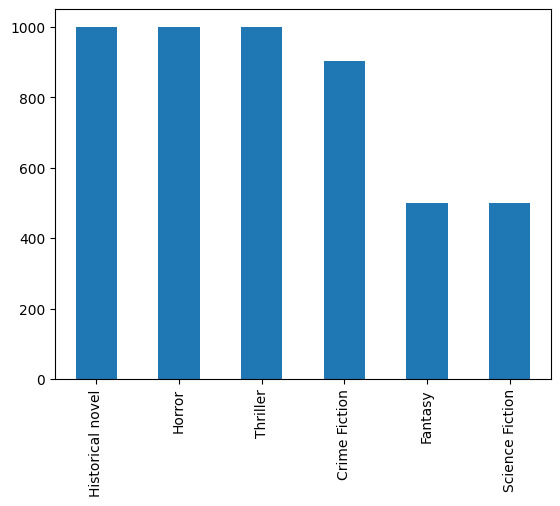

In [45]:
genre_value_counts.plot(kind='bar')

In [23]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    4903 non-null   object
 1   book_name  4902 non-null   object
 2   genre      4902 non-null   object
 3   summary    4902 non-null   object
dtypes: object(4)
memory usage: 153.3+ KB


In [24]:
books.isna().sum()

book_id      0
book_name    1
genre        1
summary      1
dtype: int64

In [58]:
x =books.loc[pd.isna(books["book_name"]), :].index
x


Int64Index([3773], dtype='int64')

In [ ]:
reset_index(3773)

In [25]:
#books["summary"].iloc[0]
books.summary[0]

' Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur\'s side and wishes the Will to be fulfilled. She appears as a leviathan/whale and suffers from Gluttony. The book begins when Leaf is visiting Arthur and they are discussing the invitation that Drowned Wednesday sent him. Arthur had been admitted to hospital because of the damage done to his leg when he attempted to enter Tuesday\'s Treasure Tower. Suddenly, the hospital room becomes flooded with water as the two are transported to the Border Sea of the House. Leaf is snatched away by a large ship with green sails, known as the Flying Mantis, while Arthur remains in his bed. When the Medallion given him by the immortal called the Mariner apparently fails to summon help, Arthur is without hope. Eventually, a buoy marking the pirate Elishar Feverfew\'s treasure floats toward him. As soon as Arthur opens it, his hand is marked with a bloody red colour. Arthur now has the Red Hand, by which Feverfew marks whoev

In [35]:
#cleaning text
import re
def cleaning (text):
  text = re.sub( "'/''"  ,"" ,str(text))
  text = re.sub( "[^a-zA-A]" ,"",str(text))
  text = re.sub( " " ,"",str(text))
  #text = " ".join(text.split())
  text = text.lower()
  return text

In [36]:
books["summary"] = books['summary'].apply(lambda x:cleaning(x))

<ipython-input-36-3b7de04896d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books["summary"] = books['summary'].apply(lambda x:cleaning(x))


In [37]:
books["summary"].iloc[0]

'rownedednesdayisthefirstrusteeamongtheorrowayswhoisonarthurssideandwishestheilltobefulfilledheappearsasaleviathanwhaleandsuffersfromluttonyhebookbeginswheneafisvisitingarthurandtheyarediscussingtheinvitationthatrownedednesdaysenthimarthurhadbeenadmittedtohospitalbecauseofthedamagedonetohislegwhenheattemptedtoenteruesdaysreasureoweruddenlythehospitalroombecomesfloodedwithwaterasthetwoaretransportedtotheordereaoftheouseeafissnatchedawaybyalargeshipwithgreensailsknownasthelyingantiswhilearthurremainsinhisbedhentheedalliongivenhimbytheimmortalcalledthearinerapparentlyfailstosummonhelparthuriswithouthopeventuallyabuoymarkingthepiratelishareverfewstreasurefloatstowardhimassoonasarthuropensithishandismarkedwithabloodyredcolourarthurnowhastheedandbywhicheverfewmarkswhoeverhasfoundhistreasuresothathecanidentifythemlaterotlongafterascavengingshipcalledtheothrescuesarthurnboardarthurgoingbythenameofarthisintroducedtounscorchtheirstateandtoaptainatapillowheirjourneybringsthemthroughtheineoftormsa

In [71]:
 #books_genre = pd.get_dummies(books.genre)
 #books_genre

 #note: dummeis doesnot work for y, beacuse at model fit we need a 1d

,Crime Fiction,Fantasy,Historical novel,Horror,Science Fiction,Thriller
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
4898,0,0,0,0,0,1
4899,0,0,0,0,0,1
4900,0,0,0,0,0,1
4901,0,0,0,0,0,1


In [76]:
#books_one_hot= pd.concat( [books_genre,books])
#books_one_hot

,Crime Fiction,Fantasy,Historical novel,Horror,Science Fiction,Thriller,book_id,book_name,genre,summary
0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4898,NaN,NaN,NaN,NaN,NaN,NaN,10372180,White Death,Thriller,"A Novel from the NUMA files, A Kurt Austin Ad..."
4899,NaN,NaN,NaN,NaN,NaN,NaN,14504372,Venus with Pistol,Thriller,Gilbert Kemp is dealer specializing in antiqu...
4900,NaN,NaN,NaN,NaN,NaN,NaN,3617412,Blackwater,Thriller,"""How do you know when you're in too deep? Dav..."
4901,NaN,NaN,NaN,NaN,NaN,NaN,11320975,The Rainbow and the Rose,Thriller,The story concerns the life of Johnnie Pascoe...


In [95]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


books['genre']= label_encoder.fit_transform(books['genre'])

books['genre'].unique()

<ipython-input-95-675582d96983>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['genre']= label_encoder.fit_transform(books['genre'])


array([1, 0, 2, 4, 3, 5, 6])

In [97]:
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,1,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,1,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,1,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,1,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,1,Taran and Gurgi have returned to Caer Dallben...


In [98]:
books.genre.shape

(4903,)

In [96]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [82]:
count_vect = CountVectorizer(max_df=.9,
                             min_df=2,
                             max_features=1000,
                             stop_words="english" )

new_summary= count_vect.fit_transform(books["summary"].apply(lambda x: np.str_(x)))
new_summary

<4903x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 331141 stored elements in Compressed Sparse Row format>

In [99]:
new_summary.shape

(4903, 1000)

In [83]:
from sklearn.model_selection import train_test_split


In [102]:
from pandas.core.internals.managers import new_block
x = new_summary
y= books['genre']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)


In [103]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((981, 1000), (3922, 1000), (981,), (3922,))

In [104]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC()
svc.fit(x_train,y_train)
y_preds= svc.predict(x_test)
print(metrics.accuracy_score(y_test,y_preds))

0.7023445463812437


In [106]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_preds= mnb.predict(x_test)
print(metrics.accuracy_score(y_test,y_preds))

0.7033639143730887


In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_preds= rfc.predict(x_test)
print(metrics.accuracy_score(y_test,y_preds))

0.8399592252803262


In [109]:
tfidf = TfidfVectorizer(max_df=.8, max_features=10000)

In [114]:
new_summary_tfidf = tfidf.fit_transform(books['summary'].apply(lambda x: np.str_(x)))

In [118]:
x = new_summary_tfidf
y= books['genre']

x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(x,y,test_size=.2)


In [120]:
svc = SVC()
svc.fit(x_train_tfidf,y_train_tfidf)
y_preds= svc.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test_tfidf,y_preds))

0.8695208970438328


In [121]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf,y_train_tfidf)
y_preds= mnb.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test_tfidf,y_preds))

0.7492354740061162


In [122]:
rfc = RandomForestClassifier()
rfc.fit(x_train_tfidf,y_train_tfidf)
y_preds= rfc.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test_tfidf,y_preds))

0.81855249745158
